In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('./functions')

from comb_loading import get_organized_colony_names
from comb_loading import load_colony_comb, load_colony_comb_at_date
from comb_loading import visualize_colony
from mask_processing_test import visualize_get_distance_to_class

In [2]:
meta_file = "/home/golden/Dropbox/bee-comb/img_to_text_df_TOEDIT.csv"
# MLS path:
meta_file = "/Users/michaelsmith/Box/3D_nest_2021/img_to_text_df_TOEDIT.csv"
beeframe_meta = pd.read_csv(meta_file)

In [3]:
# Get names of colonies that have frame order information in 
# img_to_text_df_TOEDIT.csv
colony_names = get_organized_colony_names(beeframe_meta)
print(f"The following colonies have frame order information:")
print(*colony_names)

The following colonies have frame order information:
DD1 DD2 DD4 DD5 DD6 DD7 SH1 SH2 SH3 SH4 SH5 SH6 SH7


In [4]:
# do ALL the definitions at the beginning this time:

beeframe_meta = pd.read_csv(meta_file)
masks_folder_root = "/Users/michaelsmith/Box/3D_nest_2021/nest_photos"
masks_folder_name = "warped_masks"

colony_name = 'DD5'
colony_rows = beeframe_meta['colony'] == colony_name # there are 300 rows for colony DD5
has_frame_info = ~beeframe_meta['beeframe'].isna()
has_side_info = ~beeframe_meta['side'].isna()
is_organized = has_frame_info & has_side_info
# there are 1756 rows with frame info, and side info, and is organized
colony_df = beeframe_meta.loc[colony_rows & is_organized] # colony DF looks good, has entries for dates/frames

dates = sorted(colony_df['date'].unique())
for date in dates:
     print(date)
date = 20210508
combine_ab=False
mirror_b=False


20210412
20210419
20210426
20210502
20210508
20210517
20210524


In [5]:
date

20210508

In [6]:
# THIS would give a "No valid info for frame" error, but for not ALL dates
# e.g. all dates but 20210412

colony = load_colony_comb(beeframe_meta, colony_name, 
                          masks_folder_root, masks_folder_name,
                          combine_ab=False
                         )


In [9]:
# would then run this, for a SINGLE date: 

colony_day = load_colony_comb_at_date(colony_df, date, 
                                          masks_folder_root, masks_folder_name,
                                          combine_ab=False
                                         )

# And then, when running "load_colony_comb" again, that date would no longer appear. 
# so... it's gotta be something with jupyter to box



In [10]:
# After doing a couple of the dates (didn't have to do all of them), the whole round of dates would work: 
# sorta weird, if you ask me... 

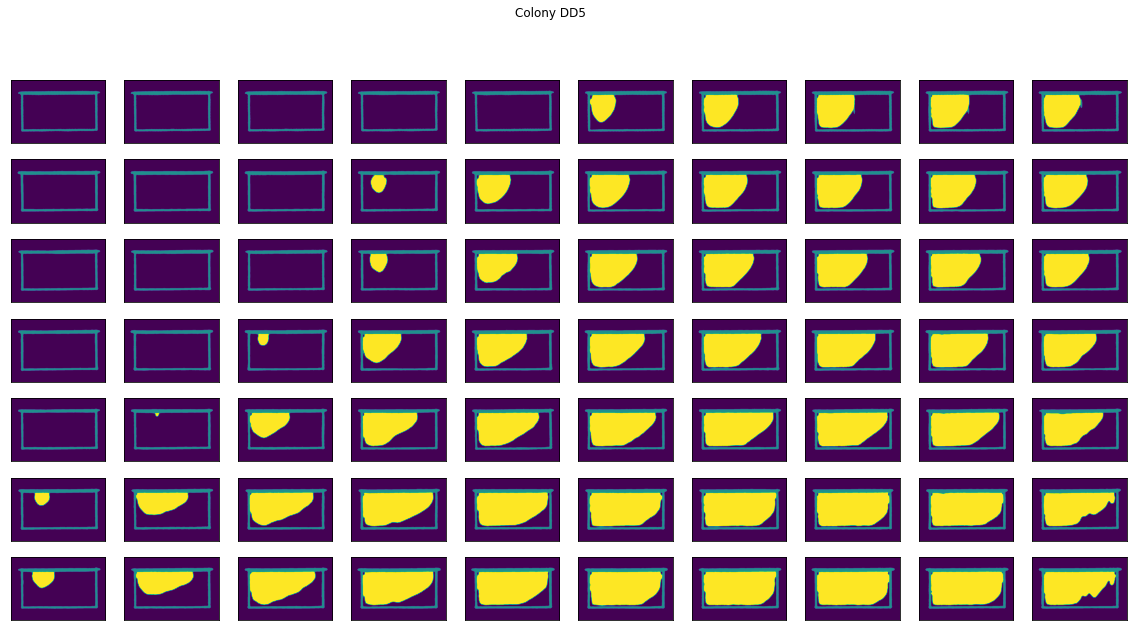

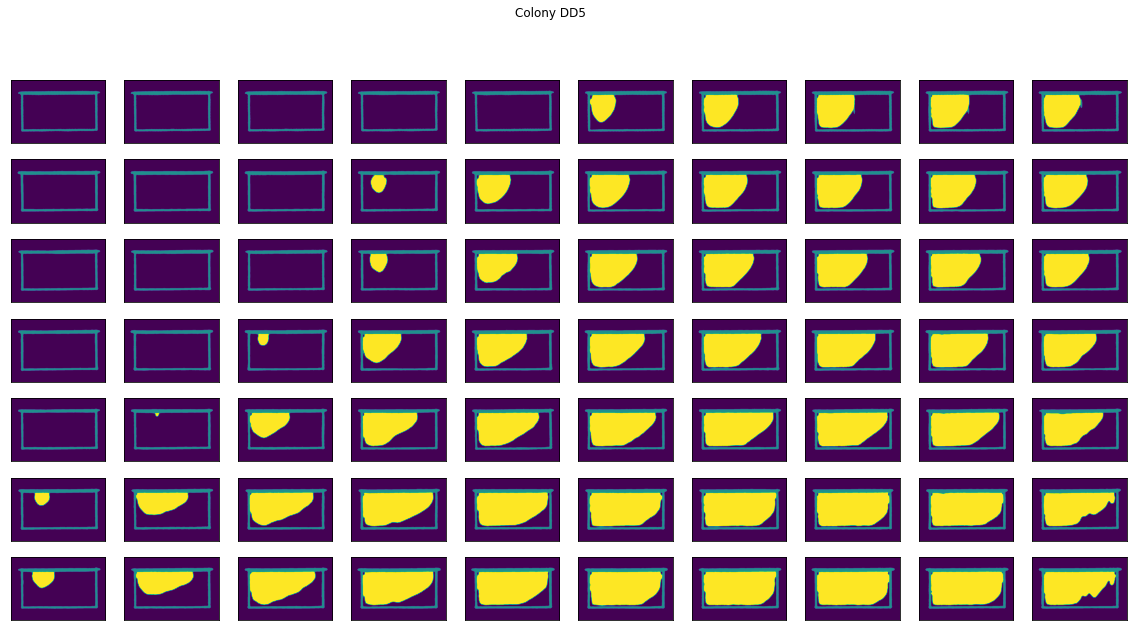

In [11]:
visualize_colony(colony, colony_name=colony_name)

distance to 2: 224.8599564173221
distance to 1: 27.0


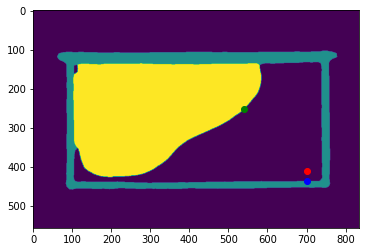

In [12]:
mask = colony[4, 3]
point = [410, 700]

comb_class = 2
wood_class = 1

class_ids = [comb_class, wood_class]
colors = ['r', 'g', 'b']
visualize_get_distance_to_class(point, mask, class_ids, colors)